In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, gc
from frontiers_colors import get_color

In [ ]:
#GTEx
df = pd.read_csv('https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct.gz', skiprows=2, compression='gzip', sep='\t')
df['ensg'] = [x[:15] for x in df['Name']]
df.set_index('Name', inplace=True)
df.set_index(['ensg'],inplace=True)
df=df.drop(['Description'],1)

df_file = pd.read_csv("https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep='\t').loc[:,['SAMPID','SMTS', 'SMTSD']]
df_file.set_index('SAMPID', inplace=True)

gc.collect()

In [ ]:
A = df.sum(axis=1)
A.name="abundance"
A.to_csv("A_gtex.dat")

In [ ]:
print("Saving data.pkl")
mean = df.mean(1)
var = df.var(1)
data = {
    'means': mean,
    'var': var,
    'freq': A/A.sum(),
    'O': df.apply(lambda x: len(x[x>0])/len(x), 1),
    'M': df.sum(0),
    'cv2': var/mean/mean,
    'diffWords': df.apply(lambda x : len(x[x>0])/len(x), 0),
    'means_nonzero': df.apply(lambda x : x[x>0].mean(), 1),
}

del mean
del var

import pickle
with open("data_gtex.pkl","wb") as file:
    pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
genelist=pd.read_csv("https://stephenslab.github.io/count-clustering/project/utilities/gene_names_all_gtex.txt", header=None).values.ravel()
df = df[df.index.isin(genelist)]

In [ ]:
plot_data = {}
for tissue in np.sort(df_files["SMTS"].unique()):
    print(tissue)
    f = df.reindex(columns=df_files[df_files["SMTS"]==tissue]['SAMPID'].values).mean(1).sort_values(ascending=False)
    plot_data[tissue]=f
    del f
    gc.collect()

<class 'KeyError'> 'Blood Vessel' <traceback object at 0x7f3eb247e100>
Blood Vessel
<class 'KeyError'> 'Cervix Uteri' <traceback object at 0x7f3eb1abf740>
Cervix Uteri
<class 'KeyError'> 'Salivary Gland' <traceback object at 0x7f3ebef0e8c0>
Salivary Gland


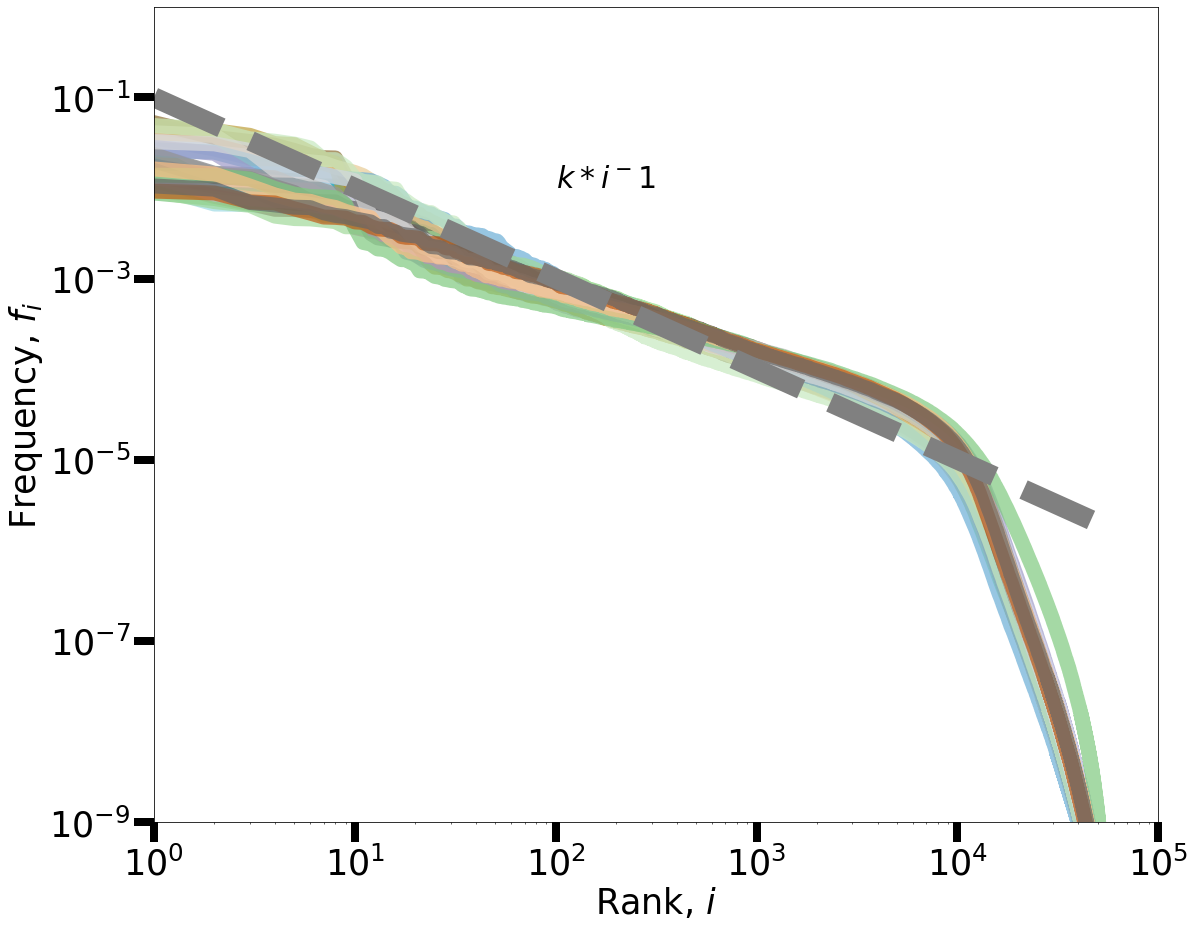

In [3]:
import pickle
with open("gtex/gtex_fdata.pkl", "rb") as f:
    plot_data=pickle.load(f)

fig, ax = plt.subplots(figsize=(18,15))

for tissue, f in plot_data.items():
    try:
        ax.plot((f/f.sum()).values, c=get_color(tissue), lw=15, alpha=.7)
    except:
        print(*sys.exc_info())
        print(tissue)
        
ax.plot(np.linspace(1,6e4,10), 1e-1*np.power(np.linspace(1,6e4,10), -1), lw=20, c='gray', ls='--')
ax.annotate('$k*i^-1$',(1e2, 1e-2), fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')

ax.tick_params(labelsize=35, width=8, length=20)
ax.set_xlim(1,1e5)
ax.set_ylim(1e-9,1e0)
ax.set_xlabel("Rank, $i$", fontsize=35)
ax.set_ylabel("Frequency, $f_i$", fontsize=35)

plt.show()

fig.savefig("zipf_alltissue_GTEx.pdf")

In [ ]:
import pickle
with open("gtex_fdata.pkl", "wb") as f:
    pickle.dump(plot_data, f)

In [ ]:
color.keys()